# 3.5 학습을 더 쉽고, 빠르고, 정확하게!

- 작성자: [김찬란](https://github.com/seriousran)

In [1]:
from keras.layers import Dense, LSTM

Using TensorFlow backend.


## 3.5.1 가중치 초기화

In [2]:
# 코드 3-98 다양한 초기화 기법

Dense(64, kernel_initializer='he_normal')
Dense(64, kernel_initializer='he_uniform')
Dense(64, kernel_initializer='glorot_normal')
Dense(64, kernel_initializer='glorot_uniform')

In [3]:
# 코드 3-99 사용자 정의 가중치 초기화 방법

from keras import backend as K

def my_init(shape, dtype=None):
  return K.random_normal(shape, dtype=dtype)

Dense(64, kernel_initializer=my_init)

## 3.5.2 고등 활성화 함수

In [4]:
# 코드 3-100 고등 활성화 함수 사용 예

from keras.layers import LeakyReLU
LeakyReLU(alpha=0.3)

## 3.5.3 규제화

In [5]:
# 코드 3-101 규제화 사용 예

from keras.regularizers import l1, l2, l1_l2

Dense(32, kernel_regularizer=l2(0.01),
      bias_regularizer=l2(0.01))
LSTM(32, kernel_regularizer=l2(0.01),
     recurrent_regularizer=l2(0.01),
     bias_regularizer=l2(0.01))

## 3.5.4 옵티마이저 비교하기

In [0]:
# 코드 3-102 옵티마이저 사용 예-1

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
# 코드 3-103 옵티마이저 사용 예-2

adam = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:
# 코드 3-104 옵티마이저 임포트 및 CIFAR-10 데이터셋 불러오기

import os
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adagrad, RMSprop, Adam

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
# 코드 3-105 기본 컨볼루션 모델 생성

def create_model(input_shape):
  inputs = Input(shape=input_shape)

  conv_1_1 = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
  conv_1_2 = Conv2D(32, (3, 3), activation='relu')(conv_1_1)
  pool_1_2 = MaxPooling2D(pool_size=(2, 2))(conv_1_2)
  drop_1_2 = Dropout(0.25)(pool_1_2)

  conv_2_1 = Conv2D(64, (3, 3), padding='same', activation='relu')(drop_1_2)
  conv_2_2 = Conv2D(64, (3, 3), activation='relu')(conv_2_1)
  pool_2_2 = MaxPooling2D(pool_size=(2, 2))(conv_2_2)
  drop_2_2 = Dropout(0.25)(pool_2_2)

  flat_3_1 = Flatten()(drop_2_2)
  fcon_3_1 = Dense(512, activation='relu')(flat_3_1)
  drop_3_1 = Dropout(0.5)(fcon_3_1)
  outputs = Dense(10, activation='softmax')(drop_3_1)
  model = Model(inputs=inputs, outputs=outputs)

  return model

In [8]:
# 코드 3-106 다섯 옵티마이저 사용 모델 생성 및 학습

models = []
for i in range(5):
  model = create_model(x_train.shape[1:])
  models.append(model)

sgd = SGD(lr=0.001)
momentum = SGD(lr=0.001, momentum=0.05)
adagrad = Adagrad(lr=0.001)
rmsprop = RMSprop(lr=0.001)
adam = Adam(lr=0.001)

optimizers = [sgd, momentum, adagrad, rmsprop, adam]

histories = []
for model, opt in zip(models, optimizers):
  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
  history = model.fit(x_train, y_train,
                         batch_size=256,
                         epochs=20,
                         validation_data=(x_test, y_test),
                         shuffle=True)
  histories.append(history)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/20





50000/50000 [==============================] - 19s 389us/step - loss: 2.3072 - acc: 0.1028 - val_loss: 2.3014 - val_acc: 0.1196
Epoch 2/20
50000/50000 [==============================] - 5s 91us/step - loss: 2.3032 - acc: 0.1066 - val_loss: 2.2993 - val_acc: 0.1339
Epoch 3/20
50000/50000 [==============================] - 5s 90us/step - loss: 2.3016 - acc: 0.1068 - val_loss: 2.2980 - val_acc: 0.1317
Epoch 4/20
50000/50000 [==============================] - 5s 91us/step - loss: 2.2997 - acc: 0.1138 - val_loss: 2.2967 - val_acc: 0.1495
Epoch 5/20
50000/50000 [==============================] - 5s 91us/step - loss: 2.2989 - acc: 0.1144 - val_loss: 2.2955 - val_acc: 0.1608
Epoch 6/20
50000/50000 [================

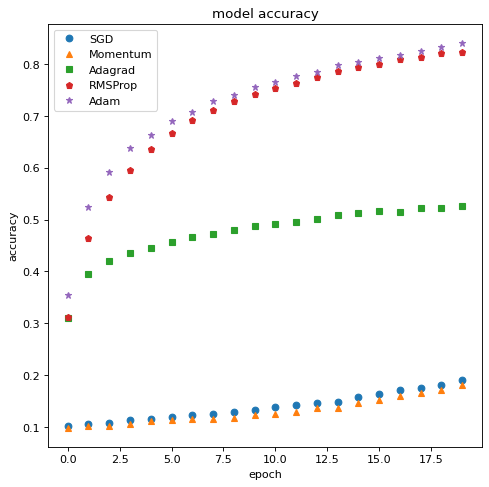

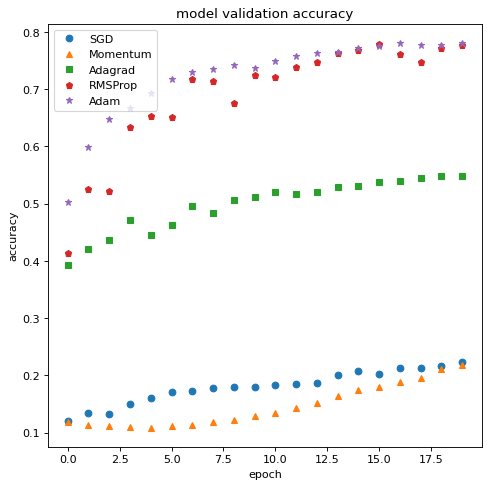

In [9]:
# 코드 3-107 다섯 모양의 그래프 그리기

plt.figure(figsize=(7, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(histories[0].history['acc'], 'o') 
plt.plot(histories[1].history['acc'], '^') 
plt.plot(histories[2].history['acc'], 's') 
plt.plot(histories[3].history['acc'], 'p') 
plt.plot(histories[4].history['acc'], '*') 
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['SGD', 'Momentum', 'Adagrad', 'RMSProp', 'Adam'], loc='upper left')  
plt.show()

plt.figure(figsize=(7, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(histories[0].history['val_acc'], 'o')  
plt.plot(histories[1].history['val_acc'], '^')  
plt.plot(histories[2].history['val_acc'], 's') 
plt.plot(histories[3].history['val_acc'], 'p') 
plt.plot(histories[4].history['val_acc'], '*') 
plt.title('model validation accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['SGD', 'Momentum', 'Adagrad', 'RMSProp', 'Adam'], loc='upper left')  
plt.show()

## 3.5.5 배치, 가중치, 그리고 정규화

In [0]:
# 코드 3-108 배치 정규화 사용 예

conv_1 = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
bnor_1 = BatchNormalization()(conv_1)
pool_1 = MaxPooling2D(pool_size=(2, 2))(bnor_1)
drop_1 = Dropout(0.25)(pool_1)

In [10]:
# 코드 3-109 배치 정규화 사용 유무에 따른 성능 비교

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import os
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

def create_model_bn(input_shape):
  inputs = Input(shape=input_shape)

  conv_1_1 = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
  conv_1_2 = Conv2D(32, (3, 3), activation='relu')(conv_1_1)
  pool_1_2 = MaxPooling2D(pool_size=(2, 2))(conv_1_2)
  drop_1_2 = Dropout(0.25)(pool_1_2)
  bnor_2_2 = BatchNormalization()(drop_1_2)
  
  conv_2_1 = Conv2D(64, (3, 3), padding='same', activation='relu')(bnor_2_2)
  conv_2_2 = Conv2D(64, (3, 3), activation='relu')(conv_2_1)
  pool_2_2 = MaxPooling2D(pool_size=(2, 2))(conv_2_2)
  drop_2_2 = Dropout(0.25)(pool_2_2)
  bnor_2_2 = BatchNormalization()(drop_2_2)
  
  flat_3_1 = Flatten()(bnor_2_2)
  fcon_3_1 = Dense(512, activation='relu')(flat_3_1)
  drop_3_1 = Dropout(0.5)(fcon_3_1)
  bnor_2_2 = BatchNormalization()(drop_3_1)
  
  outputs = Dense(10, activation='softmax')(bnor_2_2)
  model = Model(inputs=inputs, outputs=outputs)

  return model

model_bn = create_model_bn(x_train.shape[1:])

adam = Adam(lr=0.001)
model_bn.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

history_bn = model_bn.fit(x_train, y_train,
            batch_size=256,
            epochs=20,
            validation_data=(x_test, y_test),
            shuffle=True)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 136us/step - loss: 1.6713 - acc: 0.4288 - val_loss: 1.4932 - val_acc: 0.4868
Epoch 2/20
50000/50000 [==============================] - 5s 107us/step - loss: 1.1378 - acc: 0.5983 - val_loss: 1.1339 - val_acc: 0.6029
Epoch 3/20
50000/50000 [==============================] - 5s 109us/step - loss: 0.9465 - acc: 0.6652 - val_loss: 0.8847 - val_acc: 0.6854
Epoch 4/20
50000/50000 [==============================] - 5s 108us/step - loss: 0.8413 - acc: 0.7034 - val_loss: 1.0255 - val_acc: 0.6629
Epoch 5/20
50000/50000 [==============================] - 5s 107us/step - loss: 0.7731 - acc: 0.7257 - val_loss: 0.7791 - val_acc: 0.7285
Epoch 6/20
50000/50000 [==============================] - 5s 107us/step - loss: 0.7129 - acc: 0.7502 - val_loss: 0.8456 - val_acc: 0.7131
Epoch 7/20
50000/50000 [========================

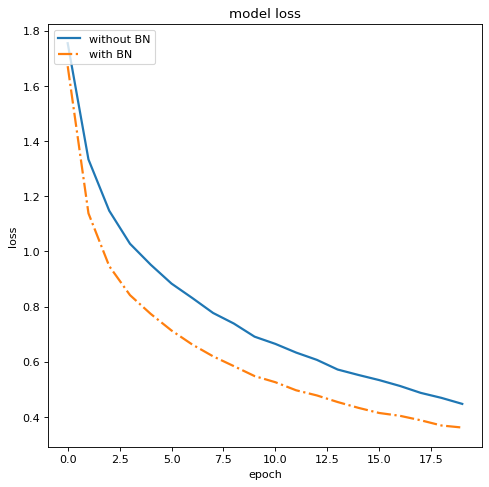

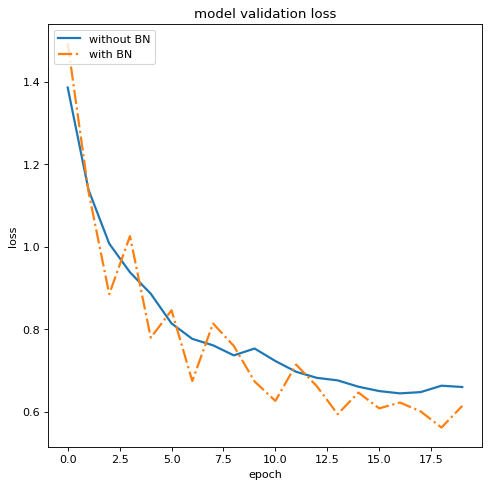

In [11]:
plt.figure(figsize=(7, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(histories[4].history['loss'], '-', linewidth=2) 
plt.plot(history_bn.history['loss'], '-.', linewidth=2) 
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['without BN', 'with BN'], loc='upper left')  
plt.show()

plt.figure(figsize=(7, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(histories[4].history['val_loss'], '-', linewidth=2) 
plt.plot(history_bn.history['val_loss'], '-.', linewidth=2) 
plt.title('model validation loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['without BN', 'with BN'], loc='upper left')  
plt.show()

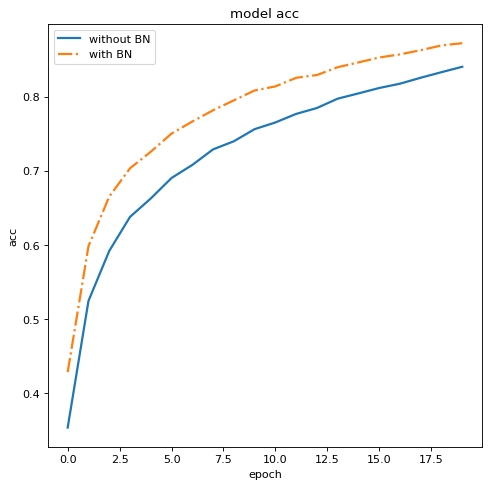

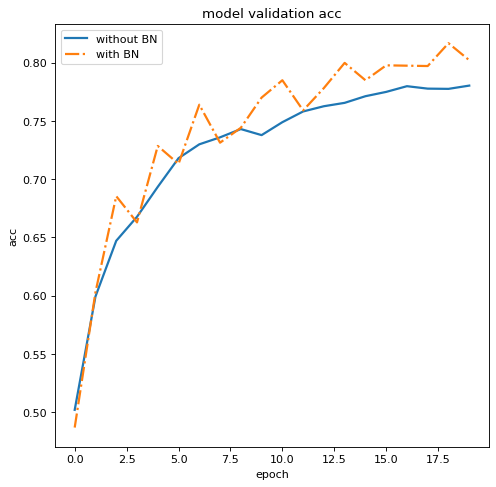

In [12]:
plt.figure(figsize=(7, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(histories[4].history['acc'], '-', linewidth=2) 
plt.plot(history_bn.history['acc'], '-.', linewidth=2) 
plt.title('model acc')  
plt.ylabel('acc')  
plt.xlabel('epoch')  
plt.legend(['without BN', 'with BN'], loc='upper left')  
plt.show()

plt.figure(figsize=(7, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(histories[4].history['val_acc'], '-', linewidth=2) 
plt.plot(history_bn.history['val_acc'], '-.', linewidth=2) 
plt.title('model validation acc')  
plt.ylabel('acc')  
plt.xlabel('epoch')  
plt.legend(['without BN', 'with BN'], loc='upper left')  
plt.show()